# Object Recognition - The EMNIST Dataset

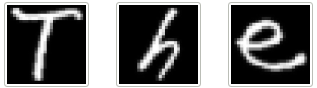

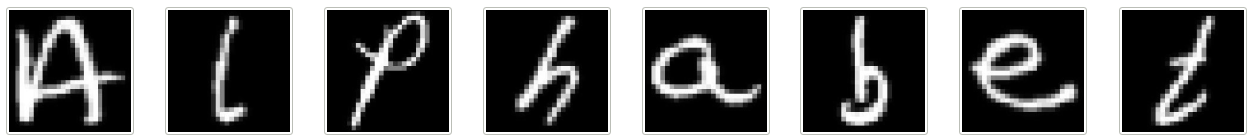

# Introduction

### Background

Hand writing to digital text has a vast array of potential. 
One example is the mass transfer of documents from hand written, paper-based format, to digital documentation.

This is a project that the NHS is currently undergoing in its goal to become paperless. 
The goal was to become paperless by 2020 however there still remains an insurmountable amount of hand written documentation which needs to be transcribed for medical and legal purposes. Manual transcription has proven to be timely and expensive (as the paperless goal set out for 2020 has not yet been achieved). 

Here we will be exploring how Artificial Intelligence and machine learning models can be used to facilitate this process. The goal is to deploy a CNN model to identify hand written characters and classify them successfully through Machine Learning.


### Methodology

The EMNIST database seeks to allow for more challenging classification tasks for neural networks and learning systems. 

I) Firstly set the value to the conventional kernels.

II) Then pass the images of the handwritten letters of the alaphabet through the kernels, in order to convolute these images.

III) Once we've convoluted these images, we can pool the images and then activate them. (We can repeat the second and third steps until we get the desired effect).

IV) Then this will result in many images which represent partial features from the originally input images.

V) The final images will now be laid out in order to generate our input layer of the fully-connected Neural Network, and based off of this, we will classify the batch of images.

VI) In order to minimise the value of the cost function, we will update the value of the weight parameters after each trainng batch, until the accuracy reaches convergence.

VII) This should result in a fine trained model which will successfully classify our letters, including both lower-case and upper-case letters.

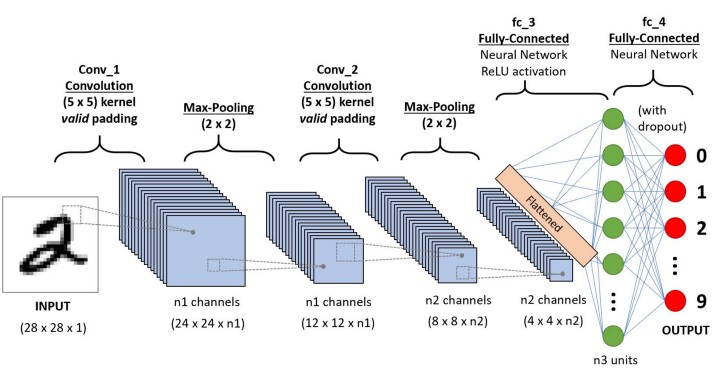

# Dataset

For this project I will be using the EMNIST dataset for training, validation, and testing of the model; and this has been taken from and inspired by (Cohen, Gregory, et al. 2017). The paper introduces the Extended Modified NIST database and seeks to allow for more challenging classification tasks for neural networks and learning systems. 

The EMNIST dataset is consists of various different splits, however I will be focusing on the EMNIST Letters subset, which consists of 145,600 characters with a 26 balanced classes; one for each letter of the english Alphabet, where 145600 is split 85% / 15% (approximately), 124800 for Training and Validation, and 20800 sample images for Testing.

Training and Validation, 124800, consists of both lowercase and uppercase letters, and is not in any particular order. Whereas the Test split of 20800 is arranged alphabetically, with mixuture of evan lower-uppercase split of 800 samples for each letter.

This EMNIST dataset is infact a derivitive of NIST Special Database 19 (Patrick J Grother et al., 1995) which was first introduced in 1995, and more recently revised in 2016, but converted to 28 by 28 pixel images. However, the EMNIST's structure is based on the MNIST dataset (LeCun et al., 1998), and is provided in binary, and Matlab formats.


### EMNIST Dataset Samples

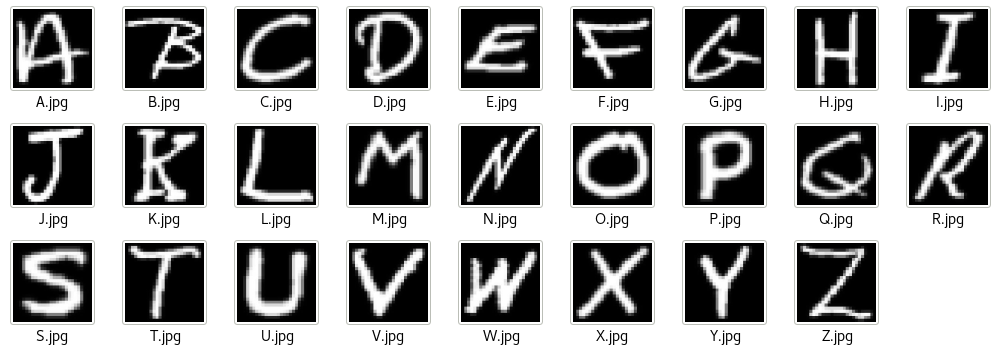

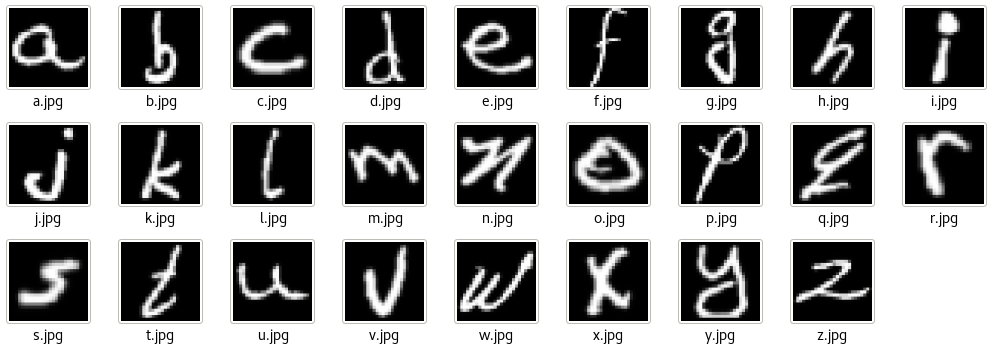

## Importing Libraries and Functions

I have designated this cell where I import libraries and functions used in this notebook.

*some functions also added further where required.

In [136]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import pylab
import os
import importlib

import pandas as pd
import torchvision.transforms as transforms
import torch
import multiprocessing as mp
import torch.nn as nn

from Functions import BinaryExtractor

#from Functions.Create_Data_Frame import *
from Functions import CNN 

from scipy.ndimage import rotate
from PIL import Image
from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset
from torchmetrics import Accuracy
from tqdm.auto import tqdm
from torch.optim.lr_scheduler import ExponentialLR
from timeit import default_timer as timer



## Extracting Binary Dataset

As this EMNIST Letters Dataset is Binary, I created a function to extract the data from this binary code, so I can first visualise the dataset a little, to check for any errors.

The BinaryExtractor has 2 functions, one for the images, and the other for the labels.
The binary code for the images uses double the bytes as the labels, as the labels only require the magic number, and the number of items; whereas Images ofcourse also have the number of rows & number of columns to make up the image pixels.

Additionally, I also found that the orientation of the dataset was off too, which I fixed with the for loop in the function, as the images needed to be corrected by fliping them and rotating them 270 degrees.

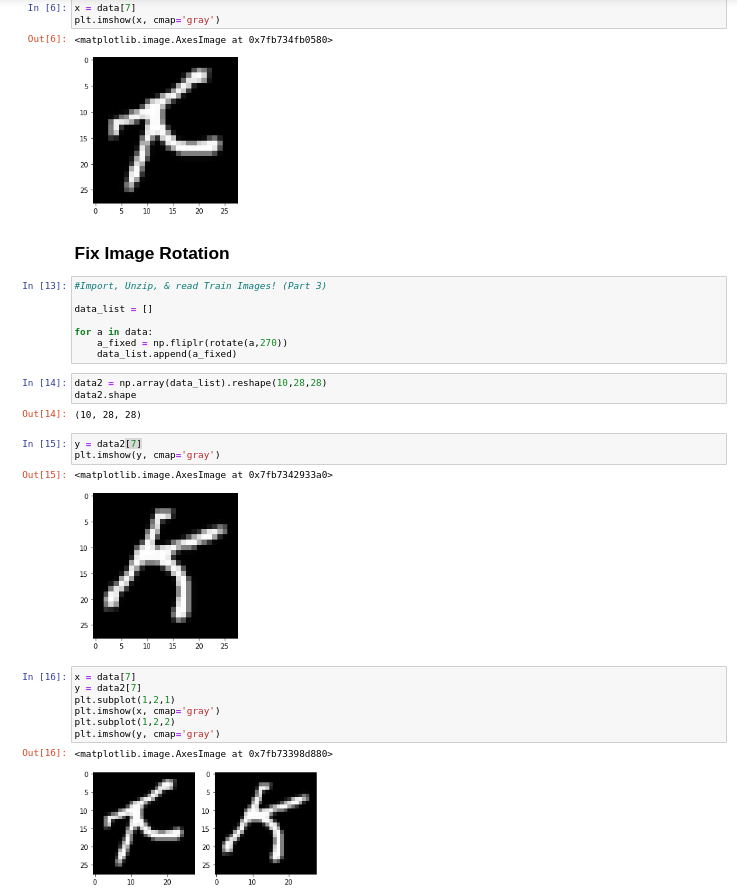

## Saving Images

Once the images were corrected, the next step was to extract all the images, as initially I decided to test 10 images; to make it commutationally cheaper, and quicker.

I quickly found that it was taking a long time to extract these Images, around an hour for the training set alone, and this isn't including the much longer time it took to save these images, which became days.

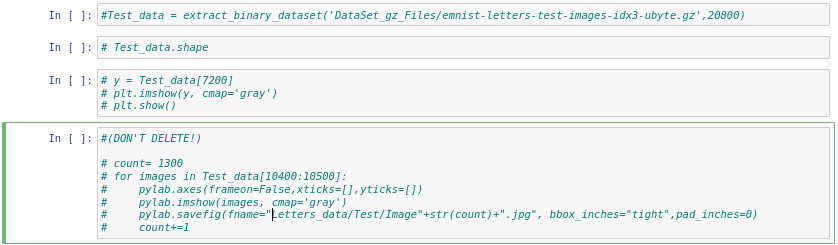

Intial approach to saving images - too time consuming.


## Quicker approach to saving Images

Instead I used torch.save to save the images as .pt files, after loading in the data via the binary extractor as data, and then loaded the images using torch.load, thereafter I don't need to re-run the binary extractor.

In [138]:
#data = BinaryExtractor.extract_binary_dataset('DataSet_gz_Files/emnist-letters-train-images-idx3-ubyte.gz',124800)

In [ ]:
#torch.save(data, "./data_less.pt")  (initally saved as data_less to test, and then saved as Train_Data_Images)

In [144]:
# data2 = torch.load("./Train_Data_Images.pt")

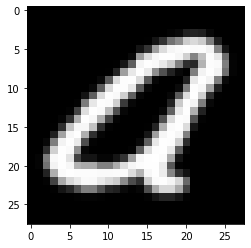

In [146]:
# x = data2[29]
# plt.imshow(x, cmap='gray')
# plt.show()

In [149]:
#data2.shape

torch.Size([124800, 28, 28])

The Labels_data for the Train data were also extracted using the Binary Extractor, and saved as a pt file for convinience.

In [5]:
# Labels_data = BinaryExtractor.extract_labels ('DataSet_gz_Files/emnist-letters-train-labels-idx1-ubyte.gz',124800)
# Labels_data

Magic no.: 2049
Num items: 124800


tensor([23,  7, 16,  ..., 13, 15, 19], dtype=torch.uint8)

## Creating CSV file

Now taking the Images from the pt files, and and the labels_data; I creating mappings.pkl files.

In [ ]:
# num_images = data2.shape[0]
# mappings = {}

# for i in range(num_images):
#     filepath = f"Letters_data/torch_binary/pic_{i}.pt"
#     image = data2[i].cpu().numpy()
#     image = torch.from_numpy(image)
#     torch.save(image, filepath)
#     mappings[filepath] = Labels_data[i].item()
    
#     print(f"saving pic_{i}.pt ({(i+1)/num_images*100:.1f})%", end="\r" if i < num_images else "\n", flush=True)




Next we import pickle, as this will help us take the pt files and creating mappings.

Once we've created the mappings, we then open and read these mappings, and then we are able to write a csv file using these mappings. This is vital step for us, as from here we can give the csv file, along with the .pt files, to the dataloader which we'll need for our model.

In [ ]:
# import pickle

# # with open ("mappings.pkl","wb") as fh:
# #     pickle.dump(mappings,fh)

In [ ]:
# with open("mappings.pkl", "rb") as fh:
#     Data_mappings = pickle.load(fh) 
# print (list(Data_mappings.keys())[9999], Data_mappings[list(Data_mappings.keys())[9999]])

In [ ]:
# with open("example.csv", "w") as fh:
# #    fh.write("number, word\n") #csv header
#     for filepath in Data_mappings:
#         fh.write(f"{filepath}, {Data_mappings[filepath]}\n")
    

We repeat the process of creating the csv file for our Test dataset too, thus we need to follow the same process in so as using the images & labels extractors, and saving as .pt files, and lastly using pickle to create mappings, and finally write the essential CSV files.

Now our data is ready for the sub-classing.

# Subclass the Dataset

Subclassing allows for manipulation of the dataset and enables a custom set which can then be used in DataLoader. I have organised the dataset as subclass below. This will allow for effective pre-processing, and eventually reading in of the Dataset CSV files.

In [112]:
class Alphabet_Dataset(Dataset):
    
    def __init__(self, csv_path): 
        super().__init__()
        
        self.data = pd.read_csv(csv_path)
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self,a):
        return self.data.iloc[a]
    

# DataLoader

I have used the DataLoader function from Pytorch, enabling me to work with the large EMNIST dataset, by allowing for processing to be done in batches and for batches to be processed side-by-side, with its Training and Validation splits in this project.

In [113]:
def custom_collate_fn(batch):
    
    # Define a tensor of the same size as our image batch to store loaded images into
    
    image_tensors= []
    labels = []
    
    for item in batch:
        # load a single image
        image_tensor = torch.load(f"{item[0]}").unsqueeze(0)
        # put image into a list 
        image_tensors.append(image_tensor)
        # put the same image's label into another list
        labels.append(item[1])
        
    image_batch_tensor = torch.stack(image_tensors)
    # Use the label list to create a torch tensor of ints
    label_batch_tensor = torch.LongTensor(labels)
    return (image_batch_tensor, label_batch_tensor)




# This is a convenience funtion that returns dataset splits of train, val and test according to the fractions specified in the arguments
def load_data(batch_sz=100, train_val_split=[0.7, 0.3]):
    assert sum(train_val_split) == 1, "Train, val and test fractions should sum to 1!"  # Always a good idea to use static asserts when processing arguments that are passed in by a user!
    
    # Instantite our previously defined dataset
    dataset = Alphabet_Dataset("Train_Val_Dataset.csv")  #Train_Val_Dataset.csv (TRAIN & VAL) # Test_Dataset.csv  (TEST)
    
    # split dataset into train, val and test
    tr_test = []
    for frac in train_val_split:
        actual_count = frac * len(dataset)
        actual_count = round(actual_count)
        tr_test.append(actual_count)
        
    print(tr_test)
    

    # Use Pytorch DataLoader to load each split into memory. It's important to pass in our custom collate function, so it knows how to interpret the 
    # data and load it. num_workers tells the DataLoader how many CPU threads to use so that data can be loaded in parallel, which is faster
    import multiprocessing as mp
    
    num_cpus = mp.cpu_count()
    train_split, val_split = random_split(dataset, tr_test)
    
    train_dl = DataLoader(train_split,
                          batch_size = batch_sz,
                          collate_fn = custom_collate_fn,
                          shuffle = True,
                          num_workers = num_cpus
                         )
    
    val_dl = DataLoader(val_split,
                         batch_size = batch_sz,
                         collate_fn = custom_collate_fn,
                         shuffle = True,
                         num_workers = num_cpus
                         )
    return train_dl, val_dl


Below we see the number of samples loaded in through above data loader, which have been asigned to my 70 / 30 split, and 25 batch size. 

In [114]:
train_dl, val_dl = load_data(batch_sz=25, train_val_split=[0.7, 0.3])

[87360, 37440]


Lengths of training and validation data per batch

In [115]:
len(train_dl), len(val_dl)

(3495, 1498)

# Device

Setting the device to the 'cuda' GPU for the purpose of accelerating the training process.

In [116]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
DEVICE

device(type='cuda')

# Early stopper

An early stopper is inserted here in order to avoid over-fitiing, and wasting of computational power and time.

Incase my model is no longer learning, the early stopper will kick in and stop the process when the early stopper detects the lack of progress; for which the tolerance and patience has been defined within my EarlyStopper module.

The early stopper is integrated into the model further below, and is designed to monitor the validation accuracy for each epoch, and determine if my model should_stop if it is no longer learning; thus wasting time, costing computing power, and overfitting the model.

In [117]:
import Functions.EarlyStopper as E_Stopper

# Logging

I will be using Tensorboard in order to log the progress of my model as this is an easy to use tool once calibirated, and it generates graphs for us to visualise the results of the training cycles.

In order to store the data from the training, I have created a 'runs' directory in this project's folder, and embeded the SummaryWriter in my model, in the Training & Validation steps; and when initiating the model; after calling the SummaryWriter class from torch.utils.tensorboard.

The model's run results can be visualised on TensorBoard's platform, by opening a terminal in the project folder and running command: tensorboard --logdir=runs/   this command will enable us to access the graphs via the http localhost link.

In [118]:
from torch.utils.tensorboard import SummaryWriter

In [119]:
from torch.optim.lr_scheduler import ExponentialLR

# Check-pointing

In order to prevent and loss of progress during my model's training runs, and I have decided to add check-pointing for my project. 

Such loss of progress could occur due to intruptions during my model's training run, accidently by myself or something like a power-outage, the machine crashing or in my case perhaps the jupyter notebook crashing which I have experienced before. Every 5 epochs, a checkpoint will be saved as part of this project, although I may increase this to every 10/15 epochs if my epochs drastically increase.

Checkpointing is really important safety-net to avoid long periods of training loss which could days or weeks work at a time.

Checkpoint function defined as below:

In [120]:
# Saves a model to file, and names it after the current epoch
def save_checkpoint(model, epoch, save_dir):
    filename = f"Checkpoint_{epoch}.pth"
    save_path = os.path.join(save_dir, filename)
    torch.save(model, save_path)

# Reloading CNN

Here I have imported the reload function from importlib library.
This enables me to reload any saved changes from the CNN.py file, without having to restart the kernal.

In [121]:
# import importlib
#importlib.reload(CNN)

# Importing Recognising Letters Neural Network

Load the CNN & initiate loss & accuracy functions, optimizer, e-stopper, Summary_Wr, and scheduler.

In [122]:
from Functions import CNN

torch.manual_seed(42)
model_1 = CNN.Recognising_Letters( input_shape=1, hidden_units=12, output_shape=26 ).to(DEVICE)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)
schedule = ExponentialLR(optimizer, gamma = 0.7)
e_stopper = E_Stopper.MyEarlyStopper (patience = 10, tolerance = 0.2)
Summary_Wr = SummaryWriter()
acc_fn = Accuracy(num_classes=26).to(DEVICE)

# Timer

Setting Timer to track duration of training loop

In [123]:
def print_train_time(start: float,
                     end: float, 
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.2f} seconds")
  return total_time

# Tiny VGG: Training and Validation Process for Main Training Model Run

In [124]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
train_time_start_model_1 = timer() 

# Train and test model
epochs = 15
checkpoint_frequency = 5
# early_stopper = EarlyStopper()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    #TODO
    CNN.train_step(epoch = epoch,
                   model = model_1,
                   data_loader = train_dl, 
                   loss_fn = loss_fn,
                   optimizer = optimizer,
                   Learning_Rate_Scheduler = schedule,
                   Summary_Wr = Summary_Wr,
                   device = DEVICE)

    if (epoch % checkpoint_frequency == 0):
        save_checkpoint(model = model_1, epoch = epoch, save_dir = "./Models_Checkpoint")
    
    if (CNN.val_step(epoch = epoch,
                  model = model_1,
                  data_loader = val_dl,
                  loss_fn = loss_fn,
                  Early_Stopper = e_stopper,
                  Summary_Wr = Summary_Wr,
                  device = DEVICE) == 0 ):
        break
        
#     val_loss = CNN.val_step(epoch = epoch,
#                   model = model_1,
#                   data_loader = test_dl,
#                   loss_fn = loss_fn,
#                   Early_Stopper = e_stopper,
#                   Summary_Wr = Summary_Wr,
#                   device = DEVICE)
    
#     if (early_stopper.should_stop(val_loss)):
#         print(f"stopping ...")
#         break

train_time_end_model_1 = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_model_1,
                                            end=train_time_end_model_1,
                                            device= DEVICE)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.61474 | Train acc: 0.81% | LR: 0.01000
Val loss: 0.39778 | Val acc: 0.88%
Epoch: 1
-------
Train loss: 0.31769 | Train acc: 0.90% | LR: 0.00700
Val loss: 0.32369 | Val acc: 0.90%
Epoch: 2
-------
Train loss: 0.26315 | Train acc: 0.91% | LR: 0.00490
Val loss: 0.29068 | Val acc: 0.91%
Epoch: 3
-------
Train loss: 0.23414 | Train acc: 0.92% | LR: 0.00343
Val loss: 0.27243 | Val acc: 0.92%
Epoch: 4
-------
Train loss: 0.21631 | Train acc: 0.93% | LR: 0.00240
Val loss: 0.24883 | Val acc: 0.92%
Epoch: 5
-------
Train loss: 0.20367 | Train acc: 0.93% | LR: 0.00168
Val loss: 0.24914 | Val acc: 0.92%
Epoch: 6
-------
Train loss: 0.19444 | Train acc: 0.94% | LR: 0.00118
Val loss: 0.24468 | Val acc: 0.92%
Epoch: 7
-------
Train loss: 0.18859 | Train acc: 0.94% | LR: 0.00082
Val loss: 0.24036 | Val acc: 0.93%
Epoch: 8
-------
Train loss: 0.18392 | Train acc: 0.94% | LR: 0.00058
Val loss: 0.24033 | Val acc: 0.93%
Epoch: 9
-------
Train loss: 0.18050 | Train acc: 0.94%

# Tensorboard Graphs

The curves in the below graphs help us visualise the Accuracy and the Loss for both the Training and the Validation runs, after 15 epoch, with the batch size: 25, and Train / Val split of 0.7 to 0.3!

For comparison, we can see the 5th from last run and the Final run thus far, and we the Model is still continuing to learn.

Final run - Feb04_21-59-43.

Train loss = 0.17399, Train accuracy = 94%
Validation loss: 0.23776, Validation accuracy = 93%

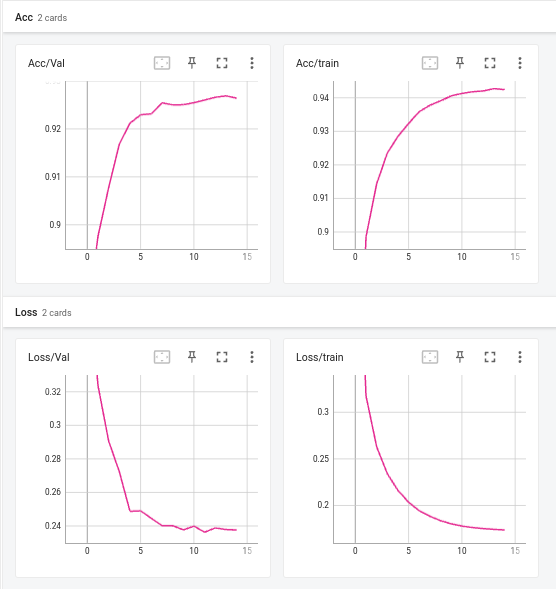

5th from last run - Feb04_20-04-15.

Train loss = 0.17769, Train accuracy = 94%
Validation loss: 0.24886, Validation accuracy= 92%

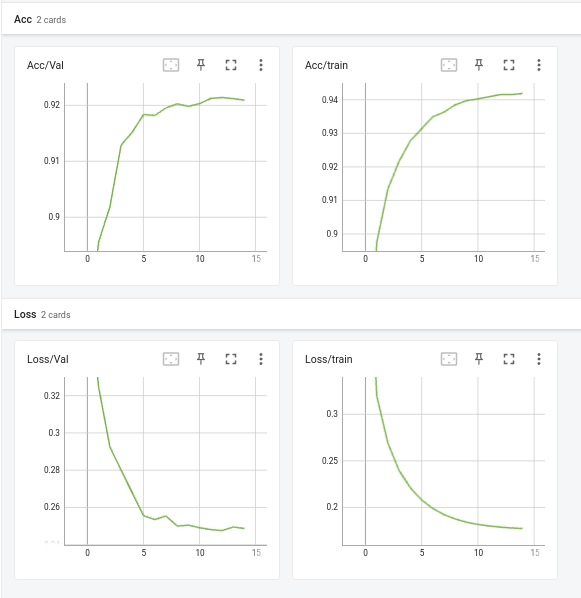

Comparison of the 2 runs:

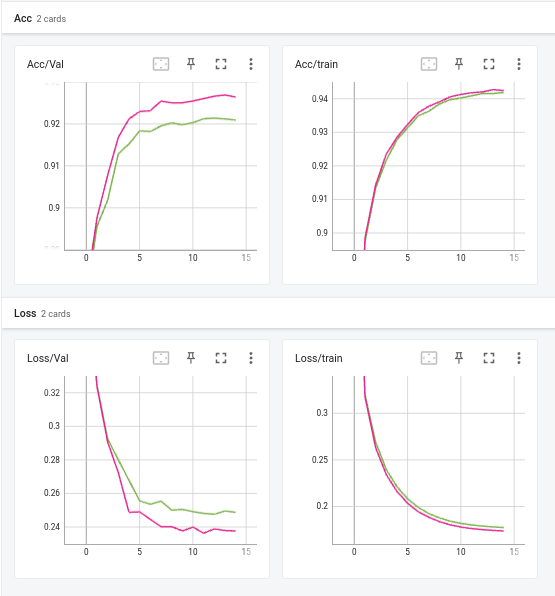

Comparison of all runs on Recognising_Letters CNN Model:
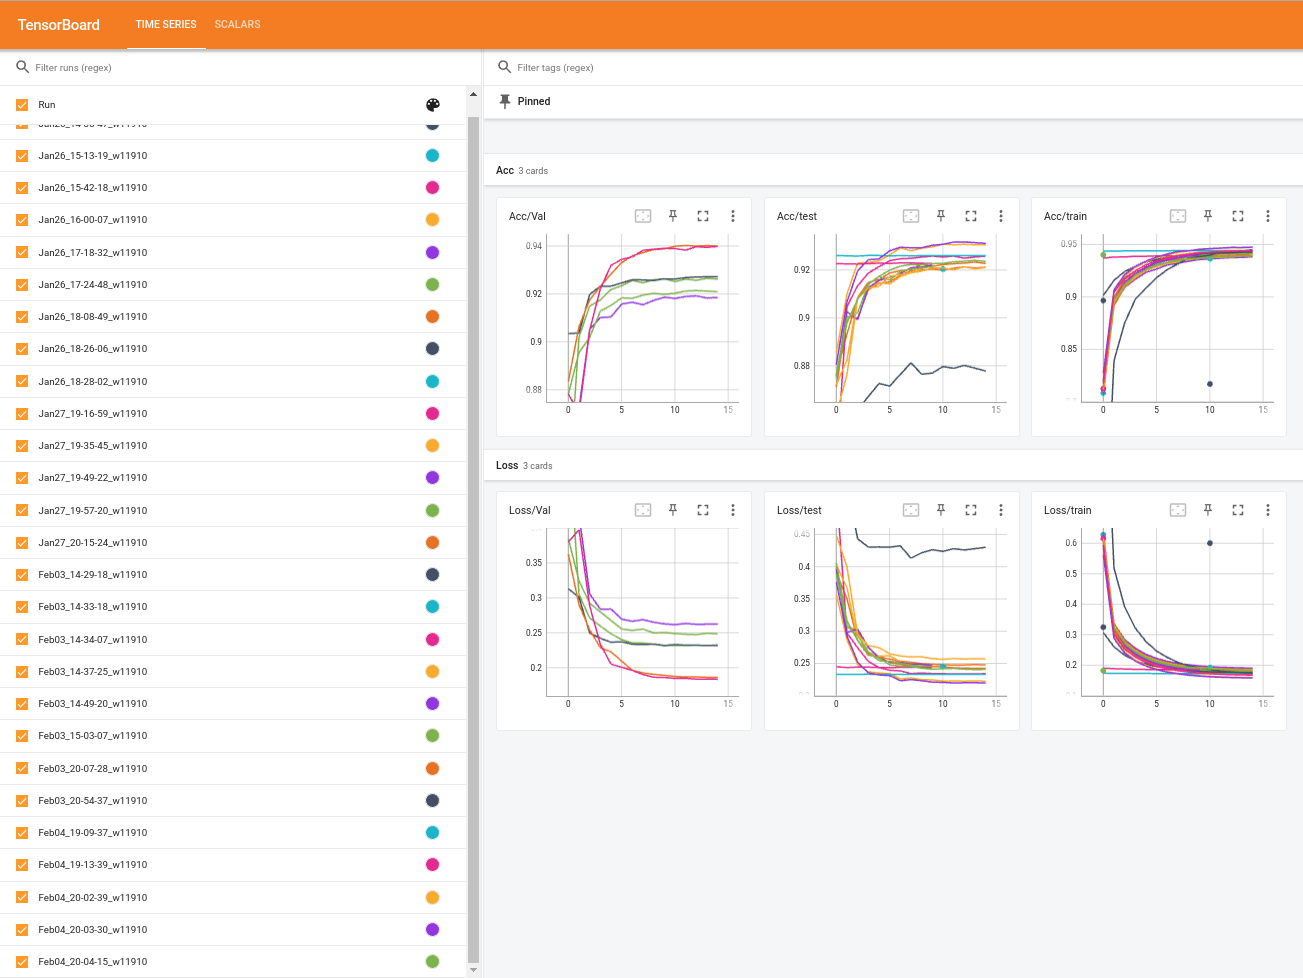

# Test Process

After having trained the Recognising_Letters (Model_1), below we test the model.
This is done using the Test_Dataset which is 14.28% of the EMNIST dataset:

This sub-dataset (Test_Dataset) consists of 20,800 letters with a varity of both Upper & Lowercase, in alphabetical with a total of 800 samples of each letter; equally distributed with upper and lowercase for each letter. (800 x 26 = 20800)

In [125]:
import multiprocessing as mp

num_cpus = mp.cpu_count()

Test_dataset = Alphabet_Dataset("Test_Dataset.csv")

Test_dl = DataLoader(Test_dataset,
                         batch_size = 25,
                         collate_fn = custom_collate_fn,
                         shuffle = True,
                         num_workers = num_cpus
                         )

CNN.T_step(epoch = epoch,
                  model = model_1,
                  data_loader = Test_dl,
                  loss_fn = loss_fn,
                  device = DEVICE)


Test loss: 0.24699 | Test acc: 0.93%


Results:

Test run gives us Test loss of under 0.25, and Test accuracy of 93%.
This compares well to the results from the model's training epochs as they produced Train loss = 0.17769, Train accuracy = 94%, which is slightly better than our Test run but not far off. However, we find the Val loss: 0.24886 is very close to the Test loss: 0.25041, and the Validation accuracy is 92%, which the Test run matches in achievement.


# Unit Testing

For the Unit & TDD Test, I created 2 test functions within test_1.py file; test_transform and test_acc. 

The tests passed with both items being collected for Training, Validation, and Testing Steps.

In [126]:
!pytest # All Train, Val, and Test steps.

============================= test session starts ==============================
platform linux -- Python 3.9.12, pytest-7.1.1, pluggy-1.0.0
rootdir: /home/s5500072/AIM/AnimationSoftwareEngineering/Assessment/AIM-Sample-Project
plugins: anyio-3.5.0
collected 2 items                                                              

test_1.py ..                                                             [100%]

======================== 2 passed in 214.64s (0:03:34) =========================


# Conclusion:

After having initially adjusted my project from trying to detect hand-written words to Recognising Hand-written Alphabet letters, I successfully managed to take the EMNIST research paper, along with its binary dataset and instructions, and created a Tiny VGG CNN model to train on this dataset.

My Tiny VGG achieved strong results of 94% Training Accuracy, 92% Validation Accuracy, and 92% Test Accuracy, with 0.17769 Training Loss, 0.24886 Validation Loss, and Test Loss of 0.25041.

Although I am satisfied with the results of my Model, in order to progress my project further, I would explore other Convolusional Neural Networks to compare the results, and perhaps other Machine Learning approaches to finder an even more accurate, and comprehensive solution to recognise handwritten documentation; thus providing a solution towards the NHS's goal of going paperless, perhaps now by 2025 instead.

# References

Cohen, Gregory, et al. "EMNIST: Extending MNIST to handwritten letters." 2017 international joint conference on neural networks (IJCNN). IEEE, 2017.

Patrick J Grother, et al. "NIST Special Database 19, Handprinted Forms and Characters Database", March 1995.

Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998. [on-line version]

